In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
from sklearn import preprocessing

### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
seed = 7
numpy.random.seed(seed)
forestfires = pd.read_csv("/Users/apple/Downloads/forestfires.csv", delimiter=",")

In [3]:
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
le = preprocessing.LabelEncoder()
for column_name in forestfires.columns:
    if forestfires[column_name].dtype == object:
        forestfires[column_name] = le.fit_transform(forestfires[column_name])
    else:
        pass

In [5]:
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
forestfires=forestfires.astype(float)

In [7]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    float64
 1   day            517 non-null    float64
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    float64
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    float64
 12  daymon         517 non-null    float64
 13  daysat         517 non-null    float64
 14  daysun         517 non-null    float64
 15  daythu         517 non-null    float64
 16  daytue         517 non-null    float64
 17  daywed         517 non-null    float64
 18  monthapr  

In [8]:
forestfires.area

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [9]:
X= forestfires.iloc[:,0:30]
Y= forestfires.iloc[:,30]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     517 non-null    float64
 1   day       517 non-null    float64
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    float64
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  dayfri    517 non-null    float64
 12  daymon    517 non-null    float64
 13  daysat    517 non-null    float64
 14  daysun    517 non-null    float64
 15  daythu    517 non-null    float64
 16  daytue    517 non-null    float64
 17  daywed    517 non-null    float64
 18  monthapr  517 non-null    float64
 19  monthaug  517 non-null    float64
 20  monthdec  517 non-null    float6

In [11]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
512    0.0
513    0.0
514    0.0
515    1.0
516    1.0
Name: size_category, Length: 517, dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [13]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-4.874674e-17,5.110891e-17,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959e+00,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-1.089076e+00,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,5.533922e-02,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,1.199754e+00,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.199754e+00,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [14]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam # - Works

In [15]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [16]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [17]:
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.990 total time=   1.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.788 total time=   1.1s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.825 total time=   1.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.874 total time=   1.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.825 total time=   1.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.817 total time=   1.4s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.786 total time=   1.4s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.893 total time=   1.4s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.864 total time=   1.7s


In [18]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9128827571868896, using {'batch_size': 10, 'epochs': 100}
0.8606235980987549,0.07031665759940771 with: {'batch_size': 10, 'epochs': 10}
0.8896004438400269,0.05763068953629719 with: {'batch_size': 10, 'epochs': 50}
0.9128827571868896,0.04649427631529634 with: {'batch_size': 10, 'epochs': 100}
0.7752800583839417,0.14162435256019998 with: {'batch_size': 20, 'epochs': 10}
0.9109223246574402,0.040340215654593274 with: {'batch_size': 20, 'epochs': 50}
0.9011949181556702,0.05217401428775747 with: {'batch_size': 20, 'epochs': 100}
0.7267363667488098,0.14768493445160774 with: {'batch_size': 40, 'epochs': 10}
0.8721620678901673,0.06859332080122861 with: {'batch_size': 40, 'epochs': 50}
0.8702763319015503,0.07046944087395837 with: {'batch_size': 40, 'epochs': 100}


In [19]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(20,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   2.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.846 total time=   1.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.883 total time=   1.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.922 total time=   2.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.874 total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   1.9s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.875 total time=   2.2s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.893 total time=   1.9s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.922 total time=   2.0s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.854 total time=   2.3s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   2.0s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.740 total time=   2.2s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.553 total time=   2.3s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.709 total time=   2.0s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.786 total time=   2.2s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.894 total time=   2.1s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.913 total time=   2.1s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.922 total time=   2.0s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.893 total time=   2.3s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   2.6s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.865 total time=   2.4s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.893 total time=   2.3s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.913 total time=   2.0s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.864 total time=   2.0s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   2.1s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.760 total time=   2.0s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   2.0s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.689 total time=   2.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.728 total time=   2.0s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   2.3s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.885 total time=   2.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.893 total time=   2.0s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.903 total time=   2.0s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.913 total time=   2.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   2.1s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.856 total time=   2.0s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.893 total time=   2.0s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.903 total time=   2.3s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.874 total time=   2.3s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   2.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   2.0s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   2.3s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.680 total time=   2.5s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.748 total time=   2.3s


In [20]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.924477219581604, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9032300233840942,0.04994961618978511 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9089805722236634,0.05069272480478371 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7577856659889222,0.1442010961449334 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.924477219581604,0.03934903253956445 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9070575118064881,0.04989003958896872 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.740272581577301,0.15312200841978105 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9186706423759461,0.04173174522257141 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9051344156265259,0.05013257490236386 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7402912616729737,0.15358536146170676 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [21]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(20,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(20,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.942 total time=   2.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   2.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.709 total time=   2.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.767 total time=   2.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.962 total time=   2.1s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   2.1s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   2.1s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.709 total time=   2.4s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.728 total time=   2.1s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.933 total time=   2.6s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   2.3s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   2.4s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   2.1s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.718 total time=   2.1s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.865 total time=   2.4s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.893 total time=   2.0s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.913 total time=   2.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.903 total time=   2.0s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.0s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.875 total time=   2.0s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.903 total time=   2.0s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.913 total time=   2.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.913 total time=   2.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   2.2s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   2.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   2.1s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   2.3s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   2.1s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.0s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   2.1s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.913 total time=   2.5s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.961 total time=   2.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.961 total time=   2.2s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.2s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.942 total time=   2.1s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.913 total time=   2.0s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.951 total time=   2.1s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.951 total time=   2.1s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   2.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   2.1s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   2.3s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   2.3s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   2.1s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.1s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   2.1s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.922 total time=   2.0s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.961 total time=   2.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   2.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.933 total time=   2.2s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.922 total time=   2.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.951 total time=   2.1s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.951 total time=   2.2s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   2.1s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   2.4s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   2.0s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   2.0s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   2.0s


In [22]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9554518461227417, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7384615421295166,0.13361213309559053 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7345406889915467,0.13905862968601557 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7248879790306091,0.1302077173266761 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9148244976997375,0.045416659364301386 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9206310749053955,0.04200922633912515 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9554518461227417,0.028485214060065822 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.951568341255188,0.028100803645324232 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9535100817680359,0.026290508291217436 with: {'activa

In [23]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.885 total time=   1.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.903 total time=   2.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.913 total time=   2.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.932 total time=   2.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   2.2s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.933 total time=   2.3s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.922 total time=   2.0s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.922 total time=   2.1s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.961 total time=   2.1s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   2.0s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.942 total time=   2.4s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.922 total time=   2.2s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.942 total time=   2.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.932 total time=   2.1s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=   2.0s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.942 total time=   2.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.903 total time=   2.3s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.942 total time=   2.2s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.961 total time=   2.4s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.9s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.952 total time=   1.9s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.922 total time=   2.0s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.942 total time=   2.0s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.932 total time=   1.9s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   1.9s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.952 total time=   1.9s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.922 total time=   2.5s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.951 total time=   2.2s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.922 total time=   2.3s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=   2.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.952 total time=   2.2s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.922 total time=   2.2s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.951 total time=   2.0s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.951 total time=   2.3s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   2.5s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.952 total time=   2.0s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.922 total time=   2.0s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.951 total time=   2.1s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.961 total time=   2.4s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   2.2s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.942 total time=   2.1s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.913 total time=   2.2s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.951 total time=   2.3s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.932 total time=   2.1s


In [24]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.957374906539917, using {'neuron1': 16, 'neuron2': 4}
0.9264376401901245,0.03984021346473259 with: {'neuron1': 4, 'neuron2': 2}
0.947703504562378,0.029762711486398367 with: {'neuron1': 4, 'neuron2': 4}
0.9476848363876342,0.027161376719325194 with: {'neuron1': 4, 'neuron2': 8}
0.9496265888214112,0.0315228729432824 with: {'neuron1': 8, 'neuron2': 2}
0.9496079087257385,0.02705276345627237 with: {'neuron1': 8, 'neuron2': 4}
0.9496079087257385,0.028412318269153337 with: {'neuron1': 8, 'neuron2': 8}
0.9554331541061402,0.025003873497805782 with: {'neuron1': 16, 'neuron2': 2}
0.957374906539917,0.024996623775159075 with: {'neuron1': 16, 'neuron2': 4}
0.9476848483085633,0.029169357093664215 with: {'neuron1': 16, 'neuron2': 8}


In [25]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 100)
# Fitting the model

history=model.fit(X_standardized,Y,validation_split=0.33, epochs=100, batch_size=20)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(Y,y_predict))
history

0.9671179883945842


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

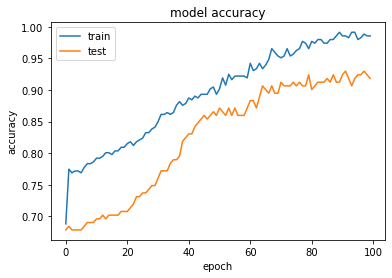

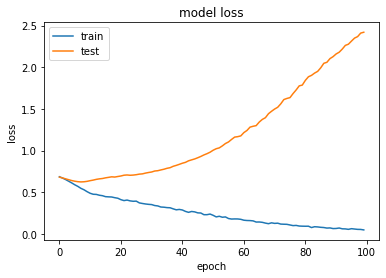

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Question 2

### predicting turbine energy yield (TEY) using ambient variables as features.

In [28]:
seed = 7
numpy.random.seed(seed)
TE=pd.read_csv("/Users/apple/Downloads/gas_turbines.csv")

In [29]:
TE

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [30]:
TE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [38]:
TE.isnull().sum().sum()

0

In [65]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [66]:
x=norm_func(TE.iloc[:, TE.columns!='TEY'])
y=norm_func(TE.iloc[:,7])

In [67]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [68]:
y

0        0.195191
1        0.195459
2        0.195325
3        0.195459
4        0.195459
           ...   
15034    0.153681
15035    0.155965
15036    0.134605
15037    0.141994
15038    0.153278
Name: TEY, Length: 15039, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size=0.4,random_state=40)

In [89]:
len(xtrain), len(ytrain),len(xtest),len(ytest)

(9023, 9023, 6016, 6016)

In [142]:
def create_model2():
    model = Sequential()
    model.add(Dense(10, input_dim=10, kernel_initializer='zero', activation='tanh'))
    model.add(Dense(8, kernel_initializer='zero', activation='tanh'))
    model.add(Dense(4, kernel_initializer='zero', activation='tanh'))
    model.add(Dense(1, kernel_initializer='zero', activation='tanh'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [145]:
model2= KerasClassifier(build_fn = create_model2,verbose = 0)
# Define the grid search parameters
batch_size = [10,15,20]
epochs = [10,15,20]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid2 = GridSearchCV(estimator = model2,param_grid = param_grid,cv = 3,verbose = 10)

In [146]:
grid_result2 = grid2.fit(x,y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START batch_size=10, epochs=10....................................
[CV 1/3; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   7.8s
[CV 2/3; 1/9] START batch_size=10, epochs=10....................................
[CV 2/3; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=   7.6s
[CV 3/3; 1/9] START batch_size=10, epochs=10....................................
[CV 3/3; 1/9] END .....batch_size=10, epochs=10;, score=0.001 total time=   7.6s
[CV 1/3; 2/9] START batch_size=10, epochs=15....................................
[CV 1/3; 2/9] END .....batch_size=10, epochs=15;, score=0.000 total time=  11.1s
[CV 2/3; 2/9] START batch_size=10, epochs=15....................................
[CV 2/3; 2/9] END .....batch_size=10, epochs=15;, score=0.000 total time=  11.3s
[CV 3/3; 2/9] START batch_size=10, epochs=15....................................
[CV 3/3; 2/9] END .....batch_size=10, epochs=15;,

In [148]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033246892659614485, using {'batch_size': 10, 'epochs': 10}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 10, 'epochs': 10}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 10, 'epochs': 15}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 10, 'epochs': 20}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 15, 'epochs': 10}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 15, 'epochs': 15}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 15, 'epochs': 20}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 20, 'epochs': 10}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 20, 'epochs': 15}
0.00033246892659614485,0.000470182065059893 with: {'batch_size': 20, 'epochs': 20}


In [155]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(10,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   9.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   8.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   8.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   8.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   8.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   8.3s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   8.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   8.3s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   8.8s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   8.8s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   8.3s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   8.3s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   8.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   8.3s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   8.7s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   9.9s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   8.7s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   8.6s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=   8.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   8.9s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   8.6s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   8.7s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   8.8s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=   8.7s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   8.6s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   9.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   8.7s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   8.8s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=   9.1s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   8.7s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=   8.6s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   8.9s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   8.5s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   8.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   8.6s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=   8.8s


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [156]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [158]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(10,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(5,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   9.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   8.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   9.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   8.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   9.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   9.6s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   8.8s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   8.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   8.9s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.000 total time=   8.8s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   8.8s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   8.8s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   9.3s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   9.1s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.000 total time=   9.0s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   8.6s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   8.7s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   8.6s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   8.7s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.000 total time=   8.7s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   9.0s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   9.2s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   8.8s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   8.6s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.000 total time=   8.6s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.7s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.6s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.9s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.000 total time=   8.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   8.9s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   9.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   9.8s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   9.4s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.000 total time=   9.0s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   8.7s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   8.6s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   8.8s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   8.6s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.000 total time=   8.7s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   8.7s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   8.9s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   8.8s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   8.8s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.000 total time=   8.7s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   8.6s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   8.7s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   8.8s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=  13.6s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   9.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   8.5s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time= 1.0min
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   9.1s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   8.8s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   9.3s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=  10.1s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   8.9s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   8.6s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   8.7s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.000 total time=   8.7s


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [159]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'zero'}


In [160]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'softmax'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   8.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   8.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   8.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   8.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   8.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   8.2s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   8.7s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   8.7s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   8.3s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.000 total time=   8.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   8.5s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   8.6s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   8.4s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   9.3s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.000 total time=   8.4s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   8.4s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   8.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   8.3s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   8.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.000 total time=   8.7s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   8.4s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   8.3s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   8.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   8.4s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.000 total time=   8.3s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   8.4s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   8.3s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   8.2s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   8.4s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.000 total time=   8.5s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   8.2s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   8.4s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   8.5s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   8.8s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.000 total time=   8.3s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   8.4s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   8.3s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   8.5s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   8.3s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.000 total time=   8.6s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   8.4s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   8.5s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   8.3s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   8.2s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.000 total time=   8.9s


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [161]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}


In [191]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(2,input_dim = 10,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'softmax'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
# Fitting the model

history=model.fit(x,y,validation_split=0.33, epochs=10, batch_size=10)

# Predicting using trained model

y_predict = model.predict(x)

# Printing the metrics



/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [192]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

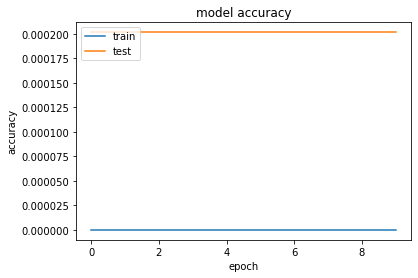

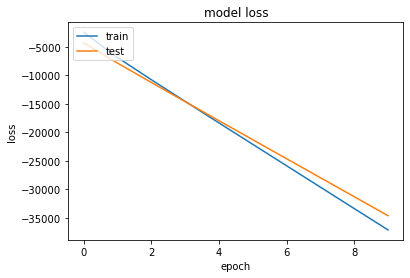

In [193]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()